In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hypernetx as hnx
import model
import utils
import glob
import pickle

# Initialization

In [18]:
# 2430 cells and 50 TFs
cell_count = 2430
gene_count = 50
infile_dir = "./../data/TEsHSPC/"
# temp_dir = "./../../locaTE.jl/examples/HSPC/mydata/networks/"
# labels_df = pd.read_csv('./../../locaTE.jl/examples/HSPC/mydata/genes.csv')
labels = utils.load_pickle(glob.glob(infile_dir + "*.pickle")[0])


In [19]:
# labels

# Graph Construction

In [20]:
m = model.HyperGraph(n_cells=cell_count, n_genes=gene_count, infile_dir=infile_dir, gene_labels=labels)
m.construct_graph(0.75) 
HG = hnx.classes.Hypergraph.collapse_edges(m.HG) 
HG = m.HG

# HNX Exploration

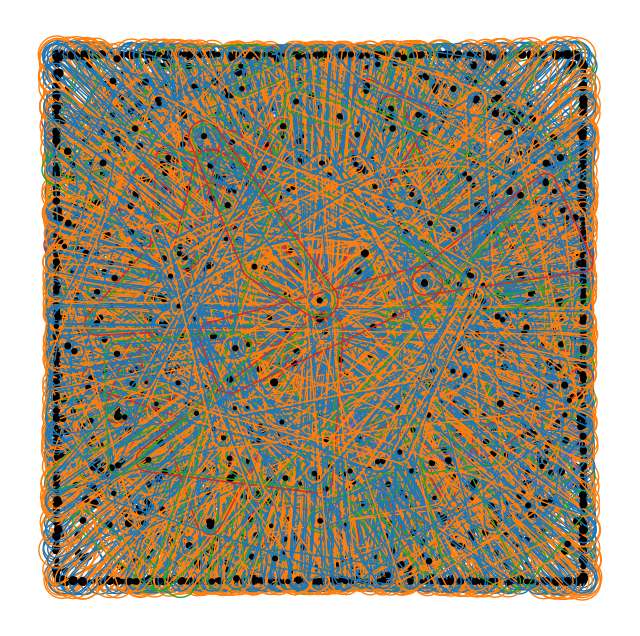

In [21]:
utils.visualize_hyperedge_set(m)

In [22]:
L, index = hnx.algorithms.laplacians_clustering.norm_lap(HG, weights=True)
L = L.toarray()

In [23]:
eigvals, eigvecs = np.linalg.eig(L)

# sort eigenvals, then sort eigenvecs by the eigenvals
sorted_indices = np.flip(np.argsort(eigvals))
sorted_eigvals = eigvals[sorted_indices] # sort the vals
sorted_eigvecs = eigvecs[:,sorted_indices] # sorts the columns

# Sanity check to ensure eigenvecs got sorted
eps = 0.0001
min_index = np.argmin(eigvals)
if (np.sum(np.abs(np.abs(eigvecs[:,min_index]) - np.abs(sorted_eigvecs[:,L.shape[0] - 1])) < eps) != L.shape[0]):
    raise ValueError("Incorrectly sorted eigenvalues")


Text(0, 0.5, 'Normalised Eigenvalues')

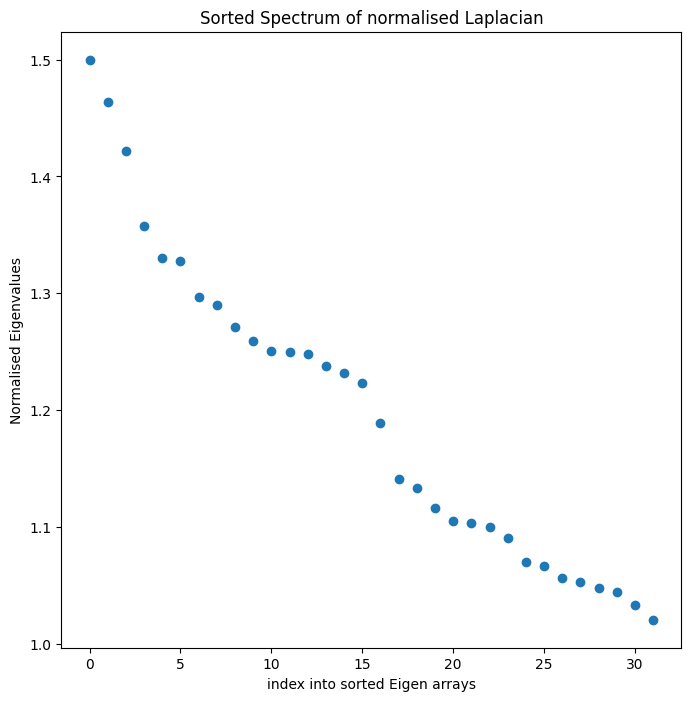

In [24]:
x = np.arange(L.shape[0])
plt.scatter(x, sorted_eigvals)
plt.title('Sorted Spectrum of normalised Laplacian')
plt.xlabel('index into sorted Eigen arrays')
plt.ylabel('Normalised Eigenvalues')

In [25]:
clusters = hnx.algorithms.laplacians_clustering.spec_clus(HG, k=8, weights=True)


In [26]:
# utils.write_results(clusters, './../results/HSPC_pathways.csv')

In [27]:
clusters

{0: ['Gfi1b', 'Nfia', 'Zfp36l1'],
 1: ['Mef2c',
  'Spi1',
  'Meis1',
  'Klf1',
  'Hmgb3',
  'Zfpm1',
  'Ikzf2',
  'Pbx1',
  'Klf6'],
 2: ['Tsc22d1', 'Zfp608', 'Mecom', 'Zbtb20'],
 3: ['Plek', 'Cebpe', 'Gata2'],
 4: ['Gfi1', 'Irf8', 'Dach1', 'Nfe2'],
 5: ['Pou2f2', 'Satb1', 'Hlf'],
 6: ['Cenpa', 'Myb', 'Hmgb2', 'Myc'],
 7: ['Ets1', 'Gata1']}